In [1]:
# %pip install jupyter
# %pip install matplotlib
# %pip install mesa==3.0.0b0
# %pip install numpy
# %pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from el_farol.model import ElFarolBar

In [3]:
memory_sizes = [5, 10, 20]
crowd_threshold = 60
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, memory_size=m)
    for m in memory_sizes
]
for model in models:
    for i in range(100):
        model.step()

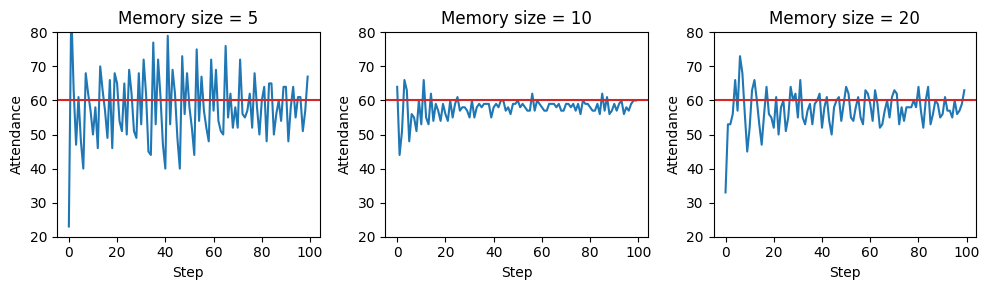

In [4]:
# You should observe that the attendance converges to 60.
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, model in enumerate(models):
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Step",
        ylabel="Attendance",
        title=f"Memory size = {memory_sizes[idx]}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()

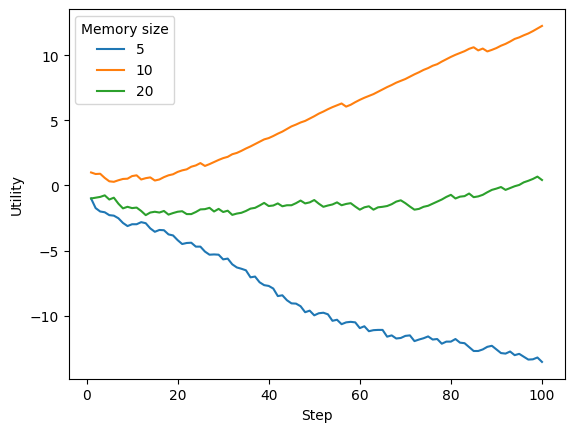

In [5]:
for idx, memory_size in enumerate(memory_sizes):
    model = models[idx]
    df = model.datacollector.get_agent_vars_dataframe()
    sns.lineplot(
        x=df.index.levels[0],
        y=df.Utility.groupby("Step").mean(),
        label=str(memory_size),
    )
plt.legend(title="Memory size");

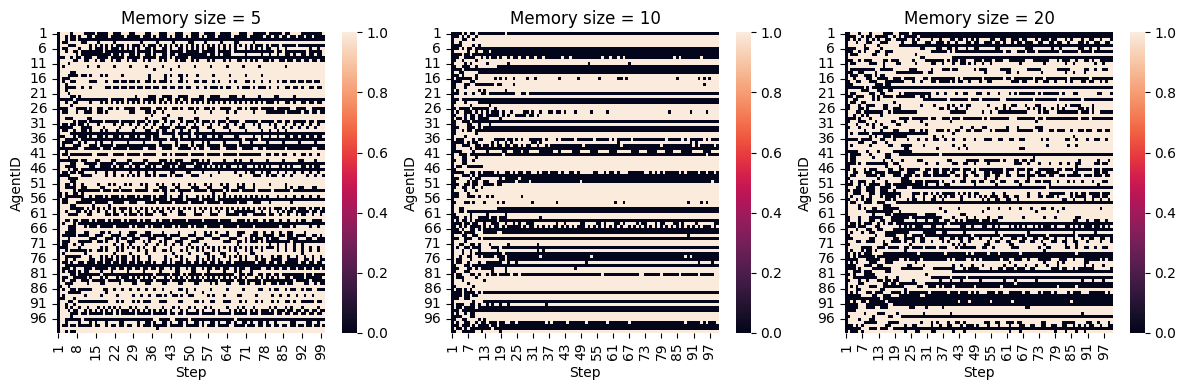

In [6]:
# Decisions made on across trials
fix, axs = plt.subplots(1, 3, figsize=(12, 4))
for idx, memory_size in enumerate(memory_sizes):
    plt.sca(axs[idx])
    df = models[idx].datacollector.get_agent_vars_dataframe()
    df.reset_index(inplace=True)
    ax = sns.heatmap(df.pivot(index="AgentID", columns="Step", values="Attendance"))
    ax.set(title=f"Memory size = {memory_size}")
    plt.tight_layout()

In [7]:
# Next, we experiment with varying the number of strategies
num_strategies_list = [5, 10, 20]
crowd_threshold = 60
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, num_strategies=ns)
    for ns in num_strategies_list
]
for model in models:
    for i in range(100):
        model.step()

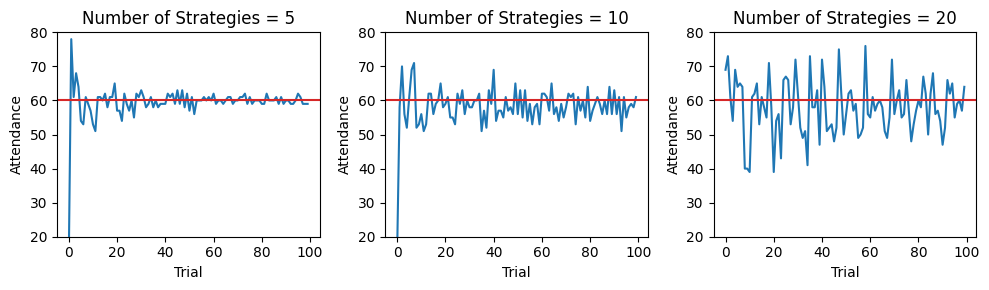

In [8]:
# Attendance of the bar based on the number of strategies
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, num_strategies in enumerate(num_strategies_list):
    model = models[idx]
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Trial",
        ylabel="Attendance",
        title=f"Number of Strategies = {num_strategies}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()